# I am just starting Jennifer's coding area

I will be looking into the following areas: 
<ul>Write the code for unsupervised learning</ul>
<ul>PCA, K means, birch, allgometric clusterings, and maybe an elbow curve</ul>
<ul>Visualize the classification</ul>

Notes: I will be deleting the code that was in Meredith's file and she will be created a finalized dataset to be used for our analysis 

Why use PCA?  
- Each component group of the original variables.
- The first component explains the most variance, the second explains the second most, and so on.
- By using only the top components that explain the most variation, we can reduce complexity while preserving essential information. Do we need this maybe?



In [1]:
# I am going to put a bunch of code here as a hold

# because I am still a little bit reliant on excel I am going to extract the dataframe to look at
# Export the DataFrame to an Excel file
# denver_transformed_df.to_excel('scaled_data_denver.xlsx', index=False)
# print
# print('DataFrame is written to Excel successfully.')
#and looking at it in here too
# denver_transformed_df

# df_cleaned = df.dropna() -- if I wanted to just drop a bunch and rename into a new dataframe

# Hold here with the standardscaler if we do not use the transformed data from above
# scaler = StandardScaler()
#df_standardized = pd.DataFrame(scaler.fit_transform(df_selected_no_null), columns=df_selected_no_null.columns)

# Apply PCA - if I have to run standardscaler here again then <df_selected_no_null> would be replaced with <df_standardized>
# this next bit of code comes from ChatGPT and Stackoverflow - this is not hardcoded
# https://stackoverflow.com/questions/46516469/principal-component-analysis-how-many-components

# If I would like to guess at the number of segments run this: 
# pca=PCA(n_components=6)
# df_pca_result = pca.fit_transform(df_selected_no_null)
# df_pca_result[:5]

# because I did not want to just blanket dropna above in the full DF I am dropping them now
# df_selected_no_null = df_selected.dropna()

# darn null values just don't work with unsupervised learning deleting them
# denver_pca_no_null = df_pca_result.dropna()

In [2]:
# importing initial libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
# grabbing the denver data set
denver_df = pd.read_csv('1_numeric_outliers_removed_transformed.csv')
denver_df.set_index('id', inplace=True)

# Check dataframe
denver_df.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other
id,,,,,,,,,,,,,,,,,,,,,
360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Check for missing values 
missing_values = denver_df.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [5]:
# Looking at the mean, min, max, and number of responses - raw data
numeric_columns = denver_df.select_dtypes(include=[int, float]).columns
# Iterate I think I am learning to love this one and it took forever to understand it

summary_data = []

for column in numeric_columns:
    mean_value = round(denver_df[column].mean(), 2)
    lowest_value = round(denver_df[column].min(), 2)
    highest_value = round(denver_df[column].max(), 2)
    reported_values = denver_df[column].count()

    # Append the following data to the summary table that I created 
    summary_data.append({
        'Column': column,
        'Mean': mean_value,
        'Lowest Value': lowest_value,
        'Highest Value': highest_value,
        'Reported Values': reported_values
    })
    
# Creating a dataframe
summary_table = pd.DataFrame(summary_data)

# I think that I am learning to use this rather than export to excel... think
print(summary_table)

                                        Column  Mean  Lowest Value  \
0                            num__accommodates  0.00         -1.43   
1                                num__bedrooms  0.00         -0.89   
2                                    num__beds  0.00         -0.94   
3                                   num__price  0.00         -1.79   
4                         num__availability_30  0.00         -0.98   
5                         num__availability_60  0.00         -1.26   
6                         num__availability_90 -0.00         -1.43   
7                        num__availability_365  0.00         -1.38   
8                       num__number_of_reviews -0.00         -0.63   
9                   num__number_of_reviews_ltm  0.00         -0.78   
10                 num__number_of_reviews_l30d  0.00         -0.71   
11                   num__review_scores_rating  0.00        -12.45   
12                 num__review_scores_accuracy -0.00        -12.91   
13              num_

Hold to include the geo spacial information once done

Transforming data so they are all on one scale - trying to decide if I should use the suggestion of square root of the price data then scaling it - ask the group this question

Starting the classification code: going to run k-means and PCA but should I run others?  Will update this box as I decide.

In [6]:
# Note to self: I need to make certain that for this analysis there are no nulls - this should be complete

# creating a 'columns_to_use' to include in PCA - this is incase we change the DF
columns_to_use = ['num__accommodates',
'num__bedrooms',
'num__beds',
'num__price',
'num__availability_30',
'num__availability_60',
'num__availability_90',
'num__availability_365',
'num__number_of_reviews',
'num__number_of_reviews_ltm',
'num__number_of_reviews_l30d',
'num__review_scores_rating',
'num__review_scores_accuracy',
'num__review_scores_cleanliness',
'num__review_scores_checkin',
'num__review_scores_communication',
'num__review_scores_location',
'num__review_scores_value',
'num__reviews_per_month',
'num__bath_number',
'bool__host_has_profile_pic_t',
'bool__host_identity_verified_t',
'bool__has_availability_t',
'bool__instant_bookable_t',
'bool__prop_type_reduced_Entire condo',
'bool__prop_type_reduced_Entire guest suite',
'bool__prop_type_reduced_Entire guesthouse',
'bool__prop_type_reduced_Entire home',
'bool__prop_type_reduced_Entire rental unit',
'bool__prop_type_reduced_Entire townhouse',
'bool__prop_type_reduced_Other',
]

# Select the columns from denver_df
df_selected = denver_df[columns_to_use]

# Create PCA with the number of components equal to the minimum of the number of columns and (number of rows - 1)
num_components = min(len(columns_to_use), len(denver_df) - 1)
pca = PCA(n_components=num_components)
df_pca_result = pd.DataFrame(pca.fit_transform(df_selected), columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Concatenate the PCA results with denver_df
df_pca_result = pd.concat([denver_df.reset_index(drop=True), df_pca_result], axis=1)

# Display the resulting DataFrame
print(df_pca_result)

      num__accommodates  num__bedrooms  num__beds  num__price  \
0             -0.562715       0.152657  -0.192967   -0.931810   
1             -0.562715      -0.885936  -0.935868    0.207151   
2             -0.997213      -0.885936  -0.935868   -0.765445   
3             -0.997213      -0.885936  -0.935868   -0.343133   
4             -0.997213      -0.885936  -0.935868   -0.010403   
...                 ...            ...        ...         ...   
3560          -0.128217      -0.885936  -0.192967    2.011574   
3561           0.306281       0.152657   0.549935    0.552679   
3562           0.740779       1.191250   0.549935   -0.445512   
3563          -0.997213      -0.885936  -0.935868   -1.443703   
3564          -0.997213      -0.885936  -0.935868   -0.982999   

      num__availability_30  num__availability_60  num__availability_90  \
0                -0.551344              0.120505              0.449145   
1                 1.504547              1.454513              1.306215 

In [7]:
# Calculate the PCA explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display or use explained_variance_ratio as needed
print(explained_variance_ratio)

[2.29315067e-01 1.78899903e-01 1.51735550e-01 1.25701360e-01
 3.63203141e-02 3.38399814e-02 3.15954503e-02 2.97499907e-02
 2.75316850e-02 1.84387126e-02 1.63376624e-02 1.32326645e-02
 1.11111054e-02 1.04357199e-02 1.00895774e-02 9.72175595e-03
 8.92920717e-03 8.24736770e-03 7.67932923e-03 6.62540181e-03
 6.09913854e-03 5.81017710e-03 5.54148982e-03 4.80226799e-03
 4.32803463e-03 3.58789332e-03 2.80728111e-03 9.40719768e-04
 3.75871449e-04 1.69320814e-04 4.52244228e-32]


In [8]:
# summing the explained variance 
explained_denver = explained_variance_ratio.sum()

# Display 
print(explained_denver)

0.9999999999999999


Explained variance for component 1: 22.93%
Explained variance for component 2: 17.89%
Explained variance for component 3: 15.17%
Explained variance for component 4: 12.57%
Explained variance for component 5: 3.63%
Explained variance for component 6: 3.38%
Explained variance for component 7: 3.16%
Explained variance for component 8: 2.97%
Explained variance for component 9: 2.75%
Explained variance for component 10: 1.84%
Explained variance for component 11: 1.63%
Explained variance for component 12: 1.32%
Explained variance for component 13: 1.11%
Explained variance for component 14: 1.04%
Explained variance for component 15: 1.01%
Explained variance for component 16: 0.97%
Explained variance for component 17: 0.89%
Explained variance for component 18: 0.82%
Explained variance for component 19: 0.77%
Explained variance for component 20: 0.66%
Explained variance for component 21: 0.61%
Explained variance for component 22: 0.58%
Explained variance for component 23: 0.55%
Explained varian

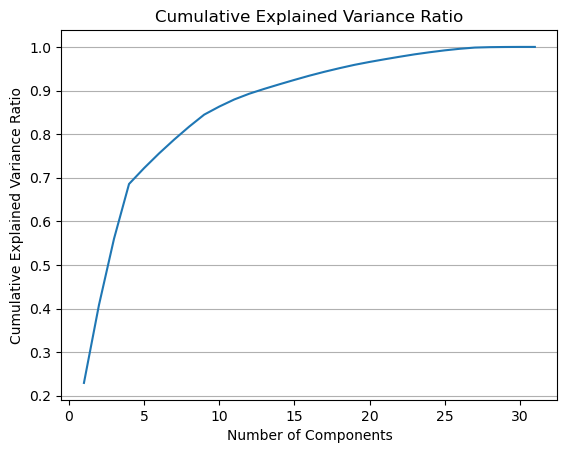

In [9]:
# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance for the first 5 components
for i in range(num_components):
    print(f"Explained variance for component {i+1}: {explained_variance_ratio[i]*100:.2f}%")

# Plot cumulative explained variance ratio
plt.plot(range(1, num_components + 1), cumulative_variance_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio")
plt.gca().yaxis.grid(True)
plt.show()

So with all components we can explain 100% of the variance, but if we wanted to aim for explaining ~80% that would be 7.  The amount of variance that is explained decreases substantially after 5 though. 
Still lets aim for 7 componets to be included.  

In [10]:
# just looking at the data to make certain I have it all
df_pca_result.tail()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
3560,-0.128217,-0.885936,-0.192967,2.011574,2.045571,1.505821,1.339179,-0.401101,-0.628756,-0.738497,...,0.033168,-0.315730,0.048481,-0.198044,-0.146659,0.028907,0.141927,-0.005917,0.002220,2.596866e-16
3561,0.306281,0.152657,0.549935,0.552679,0.855318,0.736201,0.581002,0.529234,-0.608808,-0.645975,...,0.083675,0.048969,-0.071756,-0.013869,-0.109525,-0.001698,-0.026895,-0.011019,-0.010603,-3.532729e-18
3562,0.740779,1.191250,0.549935,-0.445512,-0.551344,-1.059578,-1.297958,-1.347340,-0.628756,-0.738497,...,-0.103808,-0.121978,-0.041189,0.040588,0.072708,-0.016030,0.001283,-0.021012,-0.009946,1.212830e-16
3563,-0.997213,-0.885936,-0.935868,-1.443703,1.612752,1.505821,1.339179,0.720072,-0.618782,-0.692236,...,0.051136,-0.070623,-0.187122,0.308806,0.851717,-0.285368,-0.002794,0.018445,-0.010963,1.759190e-16
3564,-0.997213,-0.885936,-0.935868,-0.982999,-0.334934,0.274429,0.185432,-0.989518,-0.598835,-0.599715,...,0.032040,0.260109,-0.572765,-0.517720,-0.043318,0.007375,-0.147555,-0.006219,-0.006526,8.806079e-17


In [11]:
# Create the denver PCA DataFrame as a seperate view
denver_pca_df = pd.DataFrame(
    df_pca_result,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
             
             #, "PC8", "PC9", "PC10", "PC11", "PC12",
             #"PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24",
             #"PC25", "PC26", "PC27", "PC28", "PC29", "PC30", "PC31"])

# Review the PCA DataFrame
denver_pca_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
3560,-0.707557,0.661665,1.544573,-2.383862,1.453551,-1.034335,1.110341
3561,1.574016,1.438984,0.993500,0.027078,0.669811,-0.069060,0.386328
3562,-1.211894,0.943473,-2.626969,0.135055,-0.084922,0.071344,0.256619
3563,-0.628951,-0.997540,2.069731,-2.575942,0.180456,-0.122826,0.327402
3564,-1.039172,-2.026408,0.353508,-0.207452,0.544102,-0.053799,1.063341


In [12]:
# Create a a list to store inertia values and the values of k
# this is ran only on PCA componets
inertia = []
k = list(range(1, 24))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(denver_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(24)

,k,inertia
0,1,59349.890982
1,2,50565.453005
2,3,40815.489087
3,4,34280.644189
4,5,28157.542074
5,6,26334.257450
6,7,24903.064243
7,8,22373.825303
8,9,21049.395491
9,10,20278.389729


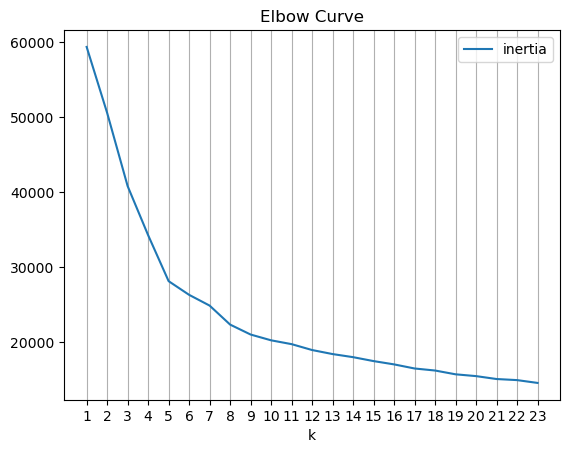

In [13]:
 # Plotting my inertia and k
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
plt.gca().xaxis.grid(True)
plt.show()

In [14]:
# Define the model Kmeans model... there are 5
model = KMeans(n_clusters=5, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_df)

# Make predictions
k_5 = model.predict(denver_pca_df)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_5 = denver_pca_df.copy()

# Add a class column with the labels
denver_pca_predictions_df_5["customer_segments_pca"] = k_5

<Axes: xlabel='PC1', ylabel='PC2'>

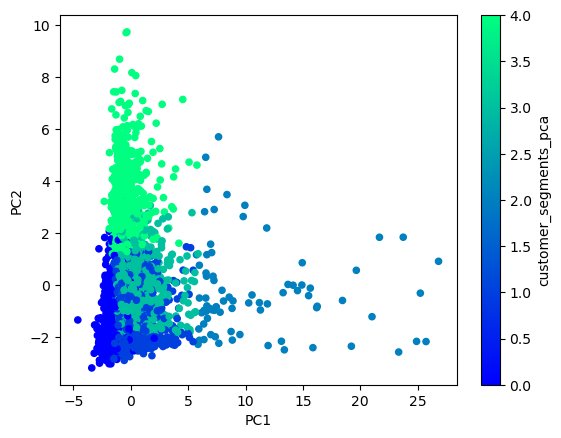

In [15]:
# Plot the clusters 
denver_pca_predictions_df_5.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments_pca",
    colormap='winter')

In [22]:
denver_pca_predictions_df_5['customer_segments_pca'] = denver_pca_predictions_df_5['customer_segments_pca'].map({0:'First',
                                                                                                               1: 'Second',
                                                                                                               2: 'Third',
                                                                                                               3: 'Forth',
                                                                                                               4: 'Fifth'})

c:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jenni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

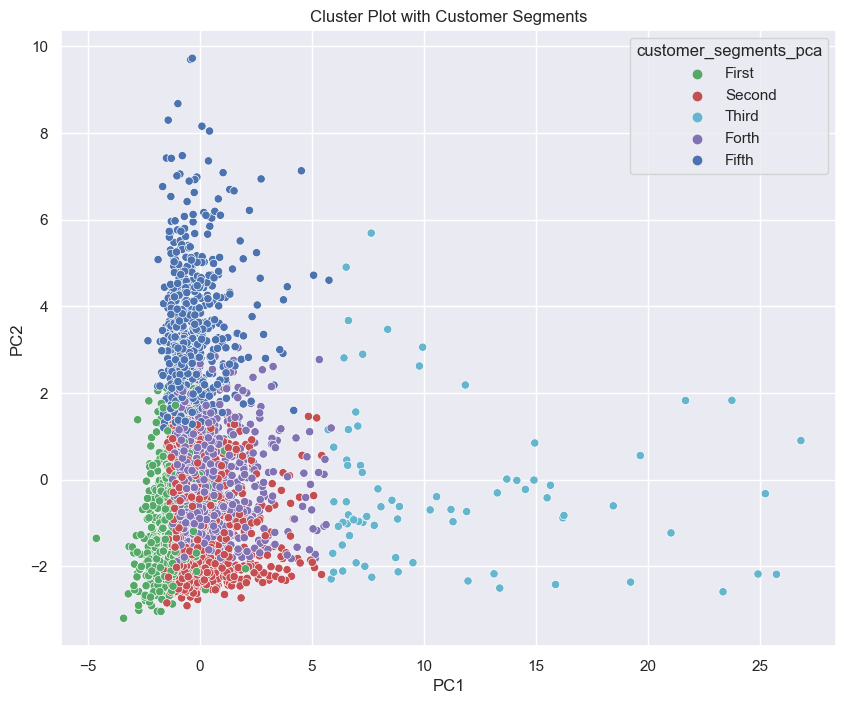

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set()

# Plot the clusters
x_axis = denver_pca_predictions_df_5['PC1']
y_axis = denver_pca_predictions_df_5['PC2']

plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x=x_axis, y=y_axis, hue=denver_pca_predictions_df_5['customer_segments_pca'],
                               palette=['g', 'r', 'c', 'm', 'b'], hue_order=['First', 'Second', 'Third', 'Forth', 'Fifth'])
plt.title('Cluster Plot with Customer Segments')

plt.show()


In [17]:
# looking at what weight more 
pca_component_weights = pd.DataFrame(pca.components_.T, columns=[
            "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
             "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24",
             "PC25", "PC26", "PC27", "PC28", "PC29", "PC30", "PC31"], index=denver_df.columns)
pca_component_weights

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
num__accommodates,-0.025802,0.454995,-0.041467,0.136402,-0.161470,0.096235,-0.065742,-0.068303,-0.196494,-0.165910,...,-0.381959,0.094063,0.055036,-0.036392,0.097123,-0.007475,-0.000945,-0.003862,0.004235,5.895448e-17
num__bedrooms,-0.016666,0.450846,-0.101945,0.094380,-0.137750,0.072218,-0.055535,-0.048387,-0.143245,-0.011186,...,0.026561,-0.060537,0.016549,0.015526,0.021750,0.013248,0.003940,0.005898,-0.002417,1.542694e-16
num__beds,-0.025518,0.444880,-0.047096,0.131122,-0.212383,0.102453,-0.100266,-0.082793,-0.248755,-0.165460,...,0.314622,-0.043211,-0.056140,0.055192,-0.077708,-0.011142,-0.001011,-0.005049,-0.004972,-4.252550e-17
num__price,-0.049108,0.354271,-0.035686,0.078509,0.451304,-0.241332,0.116479,0.129999,0.556538,-0.454294,...,0.058650,0.033036,0.004101,-0.058337,-0.032829,0.026820,0.002067,-0.005711,0.002144,-5.992975e-17
num__availability_30,0.066757,0.155417,0.402636,-0.254885,0.049487,-0.136603,0.202837,-0.265510,-0.050163,0.038385,...,0.026357,-0.058583,-0.030882,-0.008081,-0.022161,0.017516,0.258683,0.006108,-0.001358,6.340290e-17
num__availability_60,0.047936,0.146659,0.459460,-0.256806,0.027378,-0.066826,0.122811,-0.172401,-0.038496,0.027599,...,-0.007818,0.034156,0.037880,0.010376,-0.003446,-0.021464,-0.772224,-0.015729,-0.007013,-9.713531e-17
num__availability_90,0.036789,0.131156,0.464987,-0.240302,0.000518,-0.008188,0.031910,-0.060426,-0.010718,0.027810,...,-0.016077,0.022675,0.039018,0.009261,0.005722,-0.007296,0.576153,0.017316,0.007928,3.779748e-17
num__availability_365,0.079580,0.091146,0.291933,-0.227447,-0.168143,0.224525,-0.526621,0.638322,0.176441,-0.022042,...,0.009963,-0.009773,-0.059153,-0.005123,-0.023052,0.019959,-0.046796,0.008484,-0.001919,-2.894185e-17
num__number_of_reviews,-0.120547,-0.086079,0.201533,0.331219,-0.299263,-0.160625,-0.450309,-0.447535,0.416034,0.084190,...,-0.022571,0.011943,0.024420,-0.019543,-0.026560,-0.007793,-0.003643,-0.001811,0.001835,5.441868e-17
num__number_of_reviews_ltm,-0.150054,-0.058444,0.286101,0.422348,-0.001865,0.006722,0.022277,0.065272,-0.010002,0.009945,...,-0.048935,-0.074935,0.033394,0.034767,0.023873,-0.017968,-0.006909,0.003567,0.002159,-7.141690e-17


Interpreting the variable loading: 
- range -1 to 1
- closer to the extreame means they are stronger indicator - using the absolute value helps

For instance PC1 the highest negative indicators are: 
- num__review_scores_communication	-0.357902992 
- num__review_scores_accuracy	-0.391565482
- num__review_scores_value	-0.400530348
- num__review_scores_rating	-0.413872924


In [ ]:
#Export the DataFrame to an Excel file
pca_component_weights.to_excel('pca_component_weights.xlsx', index=False)
print
print('DataFrame is written to Excel successfully.')


Running KMeans on origial data sets to see what they classify items as

In [18]:
# Define the model Kmeans model with all factors using the K-means algorithm
# this is running a seperate kmeans model on the original data not PCA data
model = KMeans(n_clusters=5, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_df)

# Make predictionsy others
k_5_all = model.predict(denver_df)

# Create a copy of the kmeans DataFrame
denver_kmeans = denver_df.copy()

# Add a class column with the labels
denver_kmeans["customer_segments"] = k_5_all

In [19]:
denver_kmeans.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other,customer_segments
id,,,,,,,,,,,,,,,,,,,,,
360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: xlabel='num__price', ylabel='num__accommodates'>

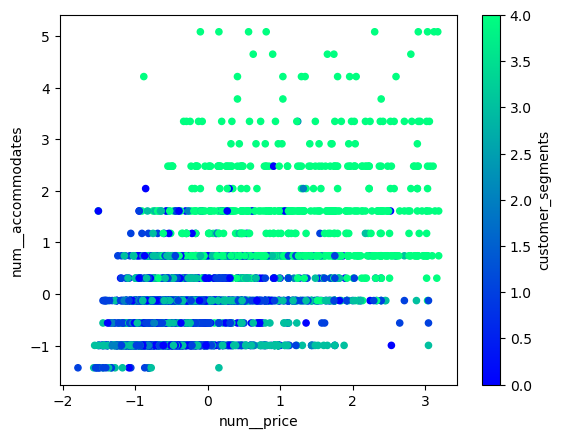

In [20]:
# Plot the clusters using price and num__accommodates  - I should probably work on this more 
denver_kmeans.plot.scatter(
    x="num__price",
    y="num__accommodates",
    c="customer_segments",
    colormap='winter')

Running the scalled data with AgglomerativeClustering and Birch clustering

In [21]:
# Import the KMeans, Birch, and AgglomerativeClustering modules from SKLearn
from sklearn.cluster import AgglomerativeClustering, Birch

In [22]:
# Agglomerative

# Fit a AgglomerativeClustering Model with three clusters
agglo_model = AgglomerativeClustering(n_clusters=5)

# Make predictions with the AgglomerativeClustering model
agglo_predictions = agglo_model.fit_predict(denver_df)

# Previewing the predicted customer classifications for AgglomerativeClustering
agglo_predictions[-10:]

array([2, 1, 2, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [23]:
# Fit a Birch Model with three clusters.
birch_model = Birch(n_clusters=5)
birch_model.fit(denver_df)

# Make predictions with the Birch model
birch_predictions = birch_model.predict(denver_df)

# Previewing the predicted customer classifications for BIRCH
birch_predictions[-10:]

array([2, 1, 2, 1, 1, 1, 1, 3, 1, 1], dtype=int64)

In [24]:
# Create a copy of the preprocessed data
denver_predictions_df = denver_df.copy()
# Add class columns with the labels to the new DataFrame
denver_predictions_df["customer_segments_pca"] = k_5
denver_predictions_df["customer_segments"] = k_5_all
denver_predictions_df["agglomerative-segments"] = agglo_predictions
denver_predictions_df["birch-segments"] = birch_predictions
# denver_predictions_df["PC1"] = PC1
# denver_predictions_df["PC2"] = PC2
# denver_predictions_df["PC3"] = PC3
# denver_predictions_df["PC4"] = PC4
# denver_predictions_df["PC5"] = PC5
# denver_predictions_df["PC6"] = PC6
# denver_predictions_df["PC7"] = PC7 ,'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'
denver_predictions_df[['customer_segments_pca', 'customer_segments','agglomerative-segments', 'birch-segments']].head(3)

,customer_segments_pca,customer_segments,agglomerative-segments,birch-segments
id,,,,
360,1,1,1,1
364,3,3,1,1
31503,3,3,1,1


In [25]:
denver_predictions_df.head(10)

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other,customer_segments_pca,customer_segments,agglomerative-segments,birch-segments
id,,,,,,,,,,,,,,,,,,,,,
360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1,1
364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3,1,1
31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,1.0,0.0,0.0,0.0,0.0,0.0,3,3,1,1
39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,4,4
154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,3
364585,0.740779,1.191250,0.549935,0.027989,-0.984163,-0.649114,-0.045318,1.141506,0.807486,-0.738497,...,0.0,0.0,0.0,0.0,1.0,0.0,4,4,1,2
504080,-0.128217,0.152657,-0.192967,-0.496701,0.747114,0.736201,0.844716,-0.830487,0.238974,-0.090847,...,0.0,0.0,1.0,0.0,0.0,0.0,3,3,1,1
521072,-0.997213,-0.885936,-0.935868,-0.688661,-0.984163,-1.264810,-0.704602,-1.021325,1.485712,-0.599715,...,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,3
575758,-0.128217,0.152657,-0.192967,0.475895,2.261981,1.813669,1.536965,1.523182,-0.269696,-0.784757,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3,1,1


In [26]:
#importing new librairies
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs

In [27]:
# figuring out which model is most accurate I read up on two types of scores from copilot
# Silhouette Score: Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    #Ranges from -1 (poor clustering) to 1 (well-separated clusters).
# Davies-Bouldin Index: Evaluates the average similarity between each cluster and its most similar cluster.
    #Lower values indicate better clustering.
# These metrics will help you compare the performance of different clustering methods without relying on ground truth labels.


# Calculate Silhouette Score
silhouette_PCAkmeans = silhouette_score(denver_predictions_df, denver_predictions_df['customer_segments_pca'])
silhouette_kmeans = silhouette_score(denver_predictions_df, denver_predictions_df['customer_segments'])
silhouette_birch = silhouette_score(denver_predictions_df, denver_predictions_df['birch-segments'])
silhouette_agglo = silhouette_score(denver_predictions_df, denver_predictions_df['agglomerative-segments'])

# Calculate Davies-Bouldin Index
db_PCAkmeans = davies_bouldin_score(denver_predictions_df, denver_predictions_df['customer_segments_pca'])
db_kmeans = davies_bouldin_score(denver_predictions_df, denver_predictions_df['customer_segments'])
db_birch = davies_bouldin_score(denver_predictions_df, denver_predictions_df['birch-segments'])
db_agglo = davies_bouldin_score(denver_predictions_df, denver_predictions_df['agglomerative-segments'])

print(f"Silhouette Score (PCA K-means): {silhouette_PCAkmeans:.2f}")
print(f"Silhouette Score (K-means): {silhouette_kmeans:.2f}")
print(f"Silhouette Score (BIRCH): {silhouette_birch:.2f}")
print(f"Silhouette Score (Agglomerative): {silhouette_agglo:.2f}")

print(f"Davies-Bouldin Index (PCA K-means): {db_PCAkmeans:.2f}")
print(f"Davies-Bouldin Index (K-means): {db_kmeans:.2f}")
print(f"Davies-Bouldin Index (BIRCH): {db_birch:.2f}")
print(f"Davies-Bouldin Index (Agglomerative): {db_agglo:.2f}")

Silhouette Score (PCA K-means): 0.26
Silhouette Score (K-means): 0.26
Silhouette Score (BIRCH): 0.20
Silhouette Score (Agglomerative): 0.16
Davies-Bouldin Index (PCA K-means): 1.36
Davies-Bouldin Index (K-means): 1.36
Davies-Bouldin Index (BIRCH): 1.51
Davies-Bouldin Index (Agglomerative): 1.61


In [ ]:
# Plot the PCA kmeans clusters using price and num__accommodates 
denver_predictions_df.plot.scatter(
    x="num__price",
    y="num__accommodates",
    c="customer_segments",
    colormap='winter')

In [ ]:
# Plot the kmeans clusters using price and num__accommodates  
denver_predictions_df.plot.scatter(
    x="num__price",
    y="num__accommodates",
    c="customer_segments",
    colormap='winter')

In [ ]:
# Plot the agglomerative clusters using price and num__accommodates  
denver_predictions_df.plot.scatter(
    x="num__price",
    y="num__accommodates",
    c="agglomerative-segments",
    colormap="winter")

In [ ]:
# Plot the birch clusters using price and num__accommodates 
denver_predictions_df.plot.scatter(
    x="num__price",
    y="num__accommodates",
    c="birch-segments",
    colormap="winter")

In [ ]:
denver_predictions_df

In [ ]:
# I am going to extract the customer_segments_pca and index into a csv file

# Reset the index (if 'id' is the index)
denver_predictions_df.reset_index(inplace=True)

# Select the desired columns
selected_columns = ['id', 'customer_segments_pca']

# Export the selected columns to a CSV file
denver_predictions_df[selected_columns].to_csv('pca_kmeans_seg.csv', index=False)

print('DataFrame is written to CSV successfully.')


In [28]:
# I am going to combine my segmented data into 1_denver_no_outliers_encoded_not_scaled
listings_df = pd.read_csv('1_denver_no_outliers_encoded_not_scaled.csv', index_col='id')
# # Select the desired columns from listings_df
selected_columns = [
'accommodates',
'bedrooms',
'beds',
'price',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'bath_number',
'prop_type_reduced_Entire condo',
'prop_type_reduced_Entire guest suite',
'prop_type_reduced_Entire guesthouse',
'prop_type_reduced_Entire home',
'prop_type_reduced_Entire rental unit',
'prop_type_reduced_Entire townhouse',
'prop_type_reduced_Other',
'has_availability_f',
'has_availability_t' 
]

# # Merge the DataFrames on the common index 'id'
merged_segments_df = denver_predictions_df.join(listings_df[selected_columns], how='inner')

# Print the updated DataFrame
merged_segments_df.head()


,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,bath_number,prop_type_reduced_Entire condo,prop_type_reduced_Entire guest suite,prop_type_reduced_Entire guesthouse,prop_type_reduced_Entire home,prop_type_reduced_Entire rental unit,prop_type_reduced_Entire townhouse,prop_type_reduced_Other,has_availability_f,has_availability_t
id,,,,,,,,,,,,,,,,,,,,,
360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Export the DataFrame to an Excel file
merged_segments_df.to_excel('scaled_denver_clusters.xlsx', index=False)
# print
print('DataFrame is written to Excel successfully.')

In [ ]:
# I just want to see if using the original price makes the plot look different
# this makes no big differences in how the graphs look but keeping the code here as a hold


# Load the 'price' column from the CSV file
# price_column = pd.read_csv('1_denver_09.23_listings.csv', usecols=['id', 'price'])

# # Set 'id' as the index for price_column
# price_column.set_index('id', inplace=True)

# # Merge 'price' column into 'denver_predictions_df' using the common index 'id'
# denver_predictions_df = denver_predictions_df.merge(price_column, left_index=True, right_index=True)

# # Print the updated DataFrame
# denver_predictions_df.head()


In [29]:
# trying another approach 

print(merged_segments_df.groupby('customer_segments_pca').describe().T.to_string())



customer_segments_pca                                      0            1           2           3           4
num__accommodates                          count  641.000000  1202.000000   78.000000  983.000000  661.000000
                                           mean    -0.261074    -0.383421   -0.284190   -0.329332    1.473707
                                           std      0.650403     0.582877    0.857563    0.601891    1.033506
                                           min     -1.431711    -1.431711   -1.431711   -1.431711   -0.128217
                                           25%     -0.997213    -0.997213   -0.997213   -0.997213    0.740779
                                           50%     -0.128217    -0.128217   -0.562715   -0.128217    1.175277
                                           75%     -0.128217    -0.128217   -0.128217   -0.128217    2.044273
                                           max      2.478771     1.609775    3.347767    1.609775    5.085760
num__bedro

In [ ]:
# Assuming you have a DataFrame merged_segments_df with relevant data
# Replace 'customer_segments_pca' with the actual column name for customer segments

# Calculate summary statistics of the segments
seg_summary_stats = merged_segments_df.groupby('customer_segments_pca').describe().T

# Export the summary statistics to a CSV file
seg_summary_stats.to_csv('summary_statistics.csv', index=True)

print('Summary statistics exported to CSV successfully.')

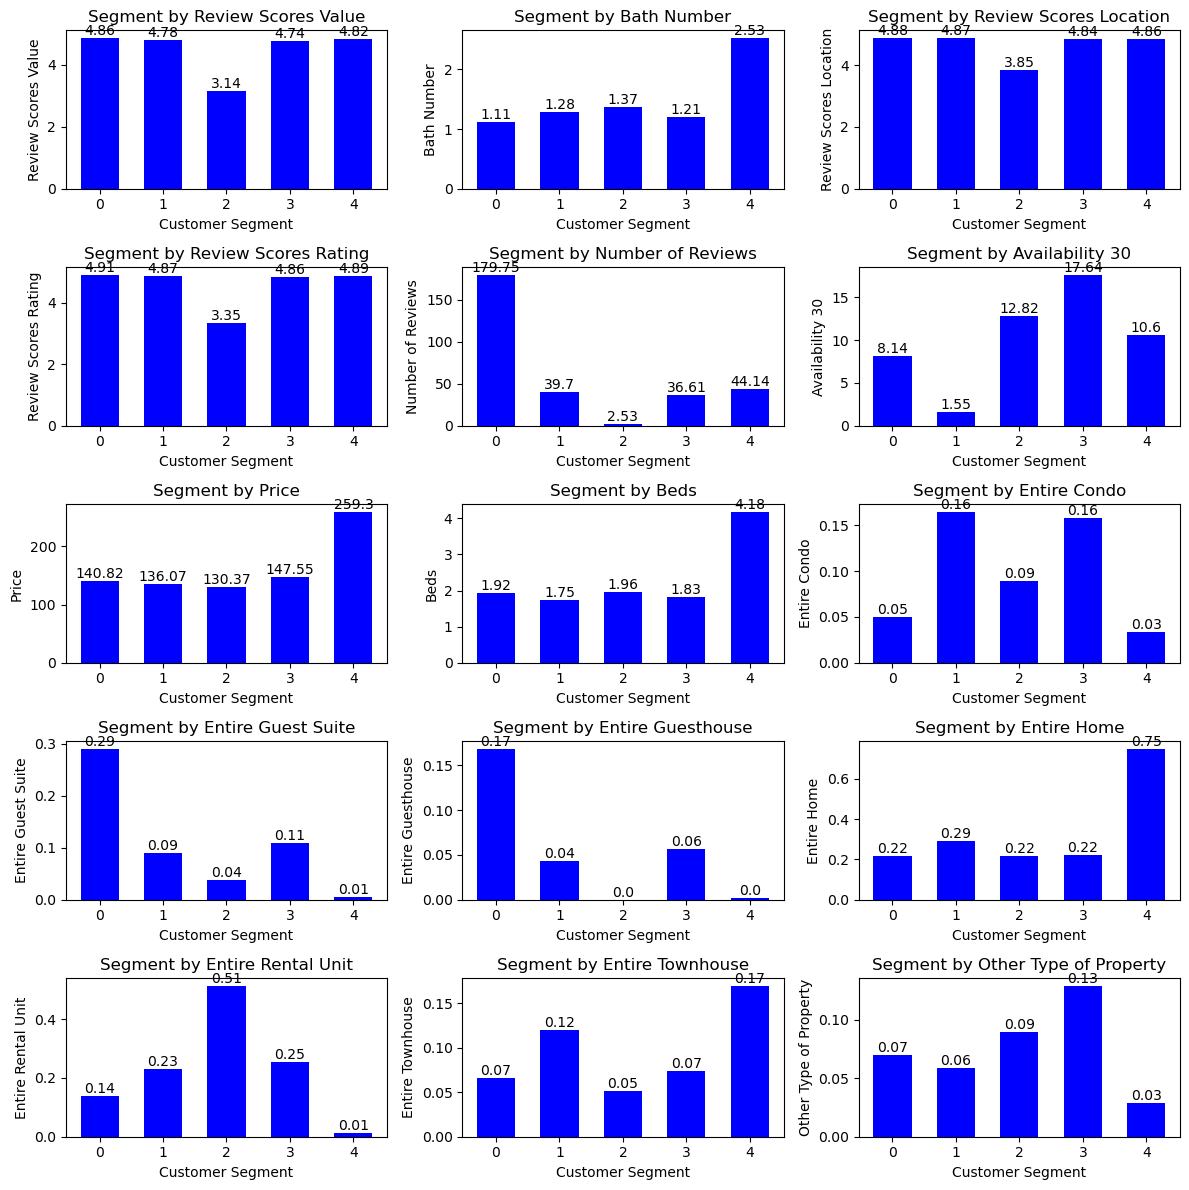

In [60]:
# creating mutliple different plots to explore what the individaul segments look like 

# Import the Matplotlib.pyplot module as plt and the pandas module as pd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'merged_segments_df' containing your data

# Define the x-axis values as a list of strings that represent the customer segments
x = ['0', '1', '2', '3', '4']

# Define the y-axis values as a list of column names that correspond to the variables you want to plot
y = ['review_scores_value', 'bath_number', 'review_scores_location', 'review_scores_rating', 'number_of_reviews',
    'availability_30', 'price' , 'beds', 'prop_type_reduced_Entire condo', 'prop_type_reduced_Entire guest suite' ,
    'prop_type_reduced_Entire guesthouse', 'prop_type_reduced_Entire home' , 'prop_type_reduced_Entire rental unit', 
    'prop_type_reduced_Entire townhouse', 'prop_type_reduced_Other']

# Define the y-axis labels as a list of strings that describe the variables
y_labels = ['Review Scores Value', 'Bath Number', 'Review Scores Location', 'Review Scores Rating', 'Number of Reviews', 
    'Availability 30', 'Price', 'Beds' , 'Entire Condo',
    'Entire Guest Suite', 'Entire Guesthouse', 'Entire Home', 'Entire Rental Unit', 'Entire Townhouse', 'Other Type of Property']

# Define the number of rows and columns for the subplots
nrows = 5
ncols = 3

# Create a figure and axes objects using plt.subplots()
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))

# Loop over the y-axis values and labels, and plot the bar charts using plt.bar() for each variable
for i in range(len(y)):
    # Get the row and column index for the subplot
    row = i // ncols
    col = i % ncols
    # Get the current axis
    ax = axes[row, col]
    
    # Calculate mean values for each customer segment
    mean_values = merged_segments_df.groupby('customer_segments_pca')[y[i]].mean()
    
    # Extract the y-axis values for the current variable
    y_values = mean_values.values
    
    # Plot the bar chart using the length of y_values as the x-axis
    bars = ax.bar(range(len(x)), height=y_values, color='blue', width=0.6, align='center')
    
    # Add labels and title
    ax.set_xlabel('Customer Segment')
    
    # Check if i is within the range of y_labels
    if i < len(y_labels):
        ax.set_ylabel(y_labels[i])
        ax.set_title(f'Segment by {y_labels[i]}')
    
    # Set the x-axis labels using plt.xticks() and pass the x-axis values and labels as arguments
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)
    
    # Add labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Adjust the layout using plt.tight_layout()
plt.tight_layout()

# Show the plot using plt.show()
plt.show()


